In [225]:
import requests
import pandas as pd
import numpy as np
import urllib
import sys, os, re, time
import json, csv
from bs4 import BeautifulSoup
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nyt_movie_reviews.csv', parse_dates=['opening_date', 'publication_date', 'date_updated'])

In [3]:
df.head()

,display_title,headline,byline,link,mpaa_rating,opening_date,publication_date,date_updated,critics_pick,summary_short
0,Who Will Write Our History,‘Who Will Write Our History’ Review: A Vital H...,KEN JAWOROWSKI,http://www.nytimes.com/2019/01/17/movies/who-w...,NaN,2018-07-21,2019-01-17,2019-01-20 03:44:26,1,"The film, directed by Roberta Grossman, tells ..."
1,Don't Come Back from the Moon,‘Don’t Come Back From the Moon’ Review: When M...,JEANNETTE CATSOULIS,http://www.nytimes.com/2019/01/17/movies/dont-...,NaN,2019-01-18,2019-01-17,2019-01-20 03:44:25,1,Blending shimmering photography and a compassi...
2,Solo,"‘Solo’ Review: Alone, Like All the Others",SEAN T. COLLINS,http://www.nytimes.com/2019/01/17/movies/solo-...,NaN,NaT,2019-01-17,2019-01-17 22:56:02,0,"With this opulent Spanish survival saga, Netfl..."
3,Glass,‘Glass’ Movie Review: A Nutty Ride With M. Nig...,MANOHLA DARGIS,http://www.nytimes.com/2019/01/17/movies/glass...,PG-13,2019-01-18,2019-01-17,2019-01-20 03:44:27,0,"In his enjoyable, messy sequel to “Unbreakable..."
4,The Standoff at Sparrow Creek,‘The Standoff at Sparrow Creek’ Review: Findin...,BEN KENIGSBERG,http://www.nytimes.com/2019/01/17/movies/the-s...,Not Rated,2019-01-18,2019-01-17,2019-01-20 03:44:26,0,"The film, written and directed by Henry Dunham..."


In [423]:
reviews = os.listdir('nyt_articles/')

In [424]:
missing = []

In [425]:
for index,row in df.iterrows():
    if str(index) + '.txt' not in reviews:
        print(index,row['headline'])
        missing.append(row)

9157 Hollywood Star vs. Local Hunk: What's a Girl to Do?
9172 Mining the Sanitized Mischief of Sitcomland
9174 Behind Smooth Footwork, Some Abrasive Gossip
9411 Pageantry and Bloodshed in 16th-Century Thailand
12219 Emigration, NY (Movie)  
12548 VAMPIRE IN BROOKLYN (MOVIE)
12550 POWDER (MOVIE)
12551 MIGHTY APHRODITE (MOVIE)
12553 COPYCAT (MOVIE)
12558 GET SHORTY (MOVIE)
12559 ACROSS THE SEA OF TIME (MOVIE)
12560 TALK (MOVIE)
12570 CYCLO (MOVIE)
12571 RIVER COLORS (MOVIE)
12572 FROM THE JOURNALS OF JEAN SEBERG (MOVIE)
12577 GOOD MEN, GOOD WOMEN (MOVIE)
12578 GUIMBA (MOVIE)
12582 STRANGE DAYS (MOVIE)
12588 LAMERICA (MOVIE)
12591 WE LOVE YOU LIKE A ROCK (MOVIE)
12592 SIXTEEN OH SIXTY (MOVIE)
13027 CLIENT, THE (BOOK)
13029 TRUE LIES (MOVIE)
13447 EXECUTION PROTOCOL, THE (BOOK)
14173 It
14554 THE STORY OF G.I. JOE (MOVIE)
14555 THE HOUSE ON NINETY-SECOND STREET (MOVIE)
15178 MRS. MINIVER (MOVIE)
15896 GUNGA DIN (MOVIE)
15903 THE LADY VANISHES (MOVIE)
15908 PYGMALION (MOVIE)
15916 THE CITAD

22706 THE PARALLAX VIEW (MOVIE)
22712 Where the Lilies Bloom (Movie)
22717 Thunderbolt and Lightfoot (Movie)
22719 Daisy Miller (Movie)
22720 Wedding in Blood (Movie)
22721 Stoolie, The (Movie)
22722 Theater of Life (Movie)
22724 Black Windmill, The (Movie)
22743 THE SUGARLAND EXPRESS (MOVIE)
22744 Red Train, The (Movie)
22746 Conrack (Movie)
22747 Ragman's Daughter, The (Movie)
22748 Catch My Soul (Movie)
22756 Pedestrian, The (Movie)
22765 Walking Tall (Movie)
22782 THE EXORCIST (MOVIE)
22786 That Man Bolt (Movie)
22787 Hell Up in Harlem (Movie)
22796 Scape-Mates (Films By Ed Emshwiller:) (Movie)
22797 Snapshots (Movie)
22798 Henry VIII and His Six Wives (Movie)
22811 Hurry Up, or I'll Be 30 (Movie)
22813 THE HOMECOMING (MOVIE)
22821 THE LONG GOODBYE (MOVIE)
22827 CHARLEY VARRICK (MOVIE)
22833 BADLANDS (MOVIE)
22862 Tall Blond Man With One Black Shoe, The (Movie)
22864 BANG THE DRUM SLOWLY (MOVIE)
22865 Sword of Vengeance (Movie)
22866 Electra Glide in Blue (Movie)
22867 Happy Mother

24380 Glass Bottom Boat, The (Movie)
24386 Lady L (Movie)
24421 THE SHOP ON MAIN STREET (MOVIE)
24430 DOCTOR ZHIVAGO (MOVIE)
24459 Juliet of the Spirits (Movie)
24477 REPULSION (MOVIE)
24478 THE HILL (MOVIE)
24506 DARLING (MOVIE)
24507 THE IPCRESS FILE (MOVIE)
24509 SHIP OF FOOLS (MOVIE)
24567 THE PAWNBROKER (MOVIE)
24576 Operation Crossbow (Movie)
24628 Goldfinger (Movie)
24631 Contempt (Movie)
24636 Last Woman of Shang, The (Movie)
24657 Seance on a Wet Afternoon (Movie)
24661 Young Swordsman (Movie)
24688 DIARY OF A CHAMBERMAID (MOVIE)
24693 Topkapi (Movie)
24694 Chagall (Movie)
24712 Behold a Pale Horse (Movie)
24794 Yesterday, Today, and Tomorrow (Part III-Mara Rome, Part II-Anna Milan and Part I-Adelina Naples) (Movie)
24823 THE SILENCE (MOVIE)
24824 DR. STRANGELOVE OR: HOW I LEARNED TO STOP WORRYING AND LOVE THE BOMB (MOVIE)
24845 America, America (Movie)
24872 Tom Jones (Movie)
24897 This Sporting Life (Movie)
24913 Hud (Movie)
24921 Sanjuro (Movie)
24967 FREUD (MOVIE)
24986 Yo

In [426]:
len(missing)

622

In [321]:
def getRequestURL(headline, byline, date=pd.NaT, debug=False):
    
    headline_clean = re.sub('[\(\)]', '', headline).lower()
    headline_clean = re.sub('movie', '', headline_clean).rstrip()
    
    searchUrl = 'https://www.nytimes.com/search?'
    
    query_dict = {}
    
#     if date is pd.NaT:
#         return ''
#     else:
#         year = str(date.year)
#         assert len(year) == 4
        
#         month = str(date.month)
#         if len(month) == 1:
#             month = '0' + month
#         assert len(month) == 2
        
#         day = str(date.day)
#         if len(day) == 1:
#             day = '0' + day
#         assert len(day) == 2
        
#         date_str = (year + month + day)
#         query_dict['endDate'] = date_str
#         query_dict['startDate'] = date_str

#     year = ''
#     if date is not pd.NaT: year = str(date.year)

#     query = byline + ' ' + headline_clean + ' review '# + year
    query = headline_clean.rstrip() + ' movie review'
        
    query_dict['query'] = query.rstrip()
    
    return searchUrl + urllib.parse.urlencode(query_dict)

In [440]:
def alphabetize(text):
    text_alpha = ''
    
    for c in text:
        if c.isalpha() or (c == ' '):
            text_alpha += c
            
    return text_alpha

def isTitleInDescription(title, description, debug=False):

    desc_lowered = description.lower()
    title_lowered = title.lower()
    
    if debug:
        print(desc_lowered)
        print(title_lowered)
    
    if title_lowered not in desc_lowered:
        
        hasAlpha = False
        
        for w in title_lowered.split():
            if w.isalpha():
                hasAlpha = True
        
        if hasAlpha:
            alphabetized = alphabetize(title_lowered)
        else:
            alphabetized = title_lowered
            
        for w in alphabetized.split():
            if w not in desc_lowered:
                return False
                
    return True

def isHeadlineInDescription(headline, description, debug=False):
    return isTitleInDescription(headline, description, debug=debug)

In [441]:
def reviewSearch(review, debug=False):

    url = getRequestURL(review['headline'], review['byline'], review['date_updated'])
#     print(url)
    if url == '':
        print('no date', url)
        return ''
    
    if debug: print(url)
    
    r = requests.get(url).text
    
    soup = BeautifulSoup(r, 'html.parser')

    search_results = soup.find('ol').findAll('li')

    if isinstance(search_results, list) and len(search_results) > 0:
        first_result = search_results[0].find('a')
        
        text = first_result.text
        
        if debug: print(text)

        try:
            href = first_result['href']
            
            if not isTitleInDescription(review['display_title'], text, debug=debug):
                if not isHeadlineInDescription(review['display_title'], text, debug=debug):
                    print('wrong result', href)
                    return ''

            split = re.split('^/\d\d\d\d/\d\d/\d\d/(.*)/', href)
            
            if len(split) > 2:
                category = split[1]
                
                if (category == 'movies') or (category == 'archives'):
                    print(href)
                    return href
                
            print('diff category', href, url)
            return ''
                
        except KeyError:
            print('no href', first_result, url)
            return ''
            
    else:
        print('no search results', url)
        return ''

In [442]:
missing[len(missing) -6]

display_title                                              Umberto D.
headline                                           UMBERTO D. (MOVIE)
byline                                                Bosley Crowther
link                http://www.nytimes.com/movie/review?res=EE05E7...
mpaa_rating                                                 Not Rated
opening_date                                      1955-11-07 00:00:00
publication_date                                  1955-11-08 00:00:00
date_updated                                      2017-11-02 04:17:17
critics_pick                                                        1
summary_short       Vittorio De Sica's poignant film is about an a...
Name: 26139, dtype: object

In [443]:
reviewSearch(missing[len(missing) -6], debug=True)

https://www.nytimes.com/search?query=umberto+d.+movie+review
Review: From Vittorio De Sica, the Comic Anxieties of la Dolce Vita“Il Boom,” starring Alberto Sordi as a building contractor with a lavish lifestyle, is a 1963 comedy that is only now getting an American release.
review: from vittorio de sica, the comic anxieties of la dolce vita“il boom,” starring alberto sordi as a building contractor with a lavish lifestyle, is a 1963 comedy that is only now getting an american release.
umberto d.
review: from vittorio de sica, the comic anxieties of la dolce vita“il boom,” starring alberto sordi as a building contractor with a lavish lifestyle, is a 1963 comedy that is only now getting an american release.
umberto d.
wrong result /2017/06/15/movies/il-boom-review-vittorio-de-sica.html


''

In [444]:
missing[5]

display_title                                     Vampire in Brooklyn
headline                                  VAMPIRE IN BROOKLYN (MOVIE)
byline                                                    Caryn James
link                http://www.nytimes.com/movie/review?res=9C05E1...
mpaa_rating                                                         R
opening_date                                      1995-10-27 00:00:00
publication_date                                  1995-10-27 00:00:00
date_updated                                      2017-11-02 04:17:49
critics_pick                                                        0
summary_short       Dapper Caribbean vampire seeks American bride....
Name: 12548, dtype: object

In [445]:
reviewSearch(missing[5], debug=True)

https://www.nytimes.com/search?query=vampire+in+brooklyn+movie+review
Single Black Vampire, New in TownIn a long black coat and flowing hair, Eddie Murphy looks as dapper and alluring as any vampire to glide across the screen lately.
single black vampire, new in townin a long black coat and flowing hair, eddie murphy looks as dapper and alluring as any vampire to glide across the screen lately.
vampire in brooklyn
single black vampire, new in townin a long black coat and flowing hair, eddie murphy looks as dapper and alluring as any vampire to glide across the screen lately.
vampire in brooklyn
wrong result /1995/10/27/movies/film-review-single-black-vampire-new-in-town.html


''

In [446]:
links = defaultdict(str)
for i,m in merged.iterrows():
    if m['available'] == 0.0:
        print(m['headline'])
        link = reviewSearch(m)
        if link:
            links[i] = link

Hollywood Star vs. Local Hunk: What's a Girl to Do?
wrong result /2004/01/23/movies/film-review-hollywood-star-vs-local-hunk-what-s-a-girl-to-do.html
Mining the Sanitized Mischief of Sitcomland
no search results https://www.nytimes.com/search?query=mining+the+sanitized+mischief+of+sitcomland+movie+review
Behind Smooth Footwork, Some Abrasive Gossip
no search results https://www.nytimes.com/search?query=behind+smooth+footwork%2C+some+abrasive+gossip+movie+review
Pageantry and Bloodshed in 16th-Century Thailand
no search results https://www.nytimes.com/search?query=pageantry+and+bloodshed+in+16th-century+thailand+movie+review
Emigration, NY (Movie)  
wrong result http://query.nytimes.com/gst/fullpage.html?res=9B0CE6DC103AF93BA25751C0A9639C8B63
VAMPIRE IN BROOKLYN (MOVIE)
wrong result /1995/10/27/movies/film-review-single-black-vampire-new-in-town.html
POWDER (MOVIE)
wrong result /2017/02/16/movies/the-great-wall-review-matt-damon.html
MIGHTY APHRODITE (MOVIE)
wrong result /1995/10/27/mov

wrong result /1982/08/25/movies/the-judge-and-the-assassin.html
SMASH PALACE (MOVIE)
wrong result /1988/07/29/movies/review-film-mixing-and-matching-in-the-singles-bar-life.html
ABSENCE OF MALICE (MOVIE)
wrong result /1981/11/15/movies/a-movie-on-the-press-stirs-a-debate.html
THE FRENCH LIEUTENANT'S WOMAN (MOVIE)
diff category /2002/11/28/arts/karel-reisz-director-of-films-including-the-french-lieutenant-s-woman-dies-at-76.html https://www.nytimes.com/search?query=the+french+lieutenant%27s+woman+movie+review
BODY HEAT (MOVIE)
wrong result /1992/05/03/books/in-short-reference-books-728692.html
ATLANTIC CITY (MOVIE)
diff category /1996/09/08/arts/one-more-spin-of-the-wheel-for-atlantic-city.html https://www.nytimes.com/search?query=atlantic+city+movie+review
First Family (Movie)
wrong result /2015/08/07/movies/review-kahlil-gibrans-the-prophet-turns-essays-into-a-family-movie.html
Magicians of the Silver Screen (Movie)
wrong result /2013/03/08/movies/oz-the-great-and-powerful-starring-ja

wrong result http://query.nytimes.com/gst/abstract.html?res=9506E5DE1039F93BA1575AC0A966948260
In God We Trust (Movie)
wrong result /2003/05/11/movies/summer-movies-god-still-ready-for-his-close-up.html
He Knows You're Alone (Movie)
wrong result /2017/11/24/arts/wonder-movie-book.html
Divine Madness (Movie)
wrong result /2007/01/12/movies/12tige.html
Bloody Kids (Movie)
wrong result /2013/03/22/movies/olympus-has-fallen-starring-gerard-butler.html
Bleak Moments (Movie)
wrong result /2016/04/01/movies/review-no-home-movie-of-love-and-melancholy.html
Bad Timing/A Sensual Obsession (Movie)
wrong result /1987/11/20/movies/at-the-movies.html
Gamekeeper, The (Movie)
wrong result http://query.nytimes.com/gst/fullpage.html?res=9B06E3D61E3EF931A15755C0A9619C8B63
Herbie Goes Bananas (Movie)
wrong result http://query.nytimes.com/gst/abstract.html?res=9F04E6DF1738E432A25757C0A9619C946890D6CF
Exterminator, The (Movie)
wrong result /1996/08/11/nyregion/subletting-joe-s-apartment-exterminate-first-ex

wrong result http://open.blogs.nytimes.com/2008/10/28/announcing-the-movie-reviews-api/
CLOSE ENCOUNTERS OF THE THIRD KIND (MOVIE)
wrong result http://query.nytimes.com/gst/abstract.html?res=9801E5DC1E3BE43ABC4E52DFB767838C669EDE
1900 (MOVIE)
wrong result /2016/07/08/movies/movie-listings-for-july-8-14.html
Roseland (Movie)
diff category /2010/10/30/arts/music/30under.html https://www.nytimes.com/search?query=roseland+movie+review
EFFI BRIEST (MOVIE)
wrong result /1984/05/20/arts/film-view-great-books-are-not-the-stuff-of-great-movies.html
Star Wars (Movie)
diff category /2017/12/13/arts/star-wars-last-jedi.html https://www.nytimes.com/search?query=star+wars+movie+review
House By the Lake, The (Movie)
wrong result /2006/06/16/movies/16lake.html
Andy Warhol's Bad (Movie)
wrong result /2012/01/25/theater/reviews/gob-squads-kitchen-inspired-by-warhol-at-public-theater.html
Wild Duck, The (Movie)
wrong result /2018/03/02/nyregion/and-the-oscar-for-best-city-as-a-movie-setting-goes-to.html


wrong result /2011/04/22/movies/what-on-earth-probes-mysteries-of-crop-circles-review.html
Ten Little Indians (Movie)
wrong result /1990/02/02/movies/review-film-of-a-platoon-lost-in-a-vietnamese-jungle.html
History Book, The (Movie)
wrong result /2001/04/01/movies/film-to-some-a-movie-is-just-an-outline-for-a-book.html
Boss Nigger (Movie)
wrong result http://query.nytimes.com/gst/abstract.html?res=9F00EEDB1738EF3ABC4C53DFB4668388669EDE
Dove, The (Movie)
diff category /2017/10/06/books/review/larry-mcmurtry-lonesome-dove-herding.html https://www.nytimes.com/search?query=dove%2C+the+movie+review
Human, Too Human (Humain, Trop Humain) (Movie)
wrong result http://query.nytimes.com/gst/abstract.html?res=9E05E5DC133CE23BA15754C2A9619C946490D6CF
Shampoo (Movie)
wrong result /2011/04/22/movies/pom-wonderful-presents-greatest-movie-ever-sold-review.html
Brief Vacation, A (Movie)
wrong result /2011/05/13/movies/vacation-review.html
Report to the Commissioner (Movie)
wrong result /1990/08/03/nyr

wrong result http://query.nytimes.com/gst/abstract.html?res=9E04E2DD163EEE37A25755C1A96F9C946290D6CF
Happy Mothers' Day, Love George (Movie)
wrong result http://query.nytimes.com/gst/abstract.html?res=9E06E4DB113DE63ABC4A53DFBF668388669EDE
Enter the Dragon (Movie)
wrong result /2017/08/25/movies/birth-of-the-dragon-review-bruce-lee.html
Long Darkness, The (Movie)
wrong result /2004/08/26/theater/fringe-festival-reviews-like-that-nicholson-movie-only-a-lot-darker.html
Cops and Robbers (Movie)
wrong result /2000/09/07/movies/film-review-three-cops-retired-but-yearning-for-action.html
AMERICAN GRAFFITI (MOVIE)
diff category /2018/11/30/obituaries/gloria-katz-dead.html https://www.nytimes.com/search?query=american+graffiti+movie+review
HEAVY TRAFFIC (MOVIE)
wrong result /2007/12/19/movies/19dist.html
THE LAST AMERICAN HERO (MOVIE)
wrong result /2006/02/26/movies/26weing.html
Hail to the Chief (Movie)
wrong result /1995/11/17/movies/film-review-a-chief-executive-in-love-in-the-white-house.h

wrong result /1994/09/25/travel/europe-the-new-season-a-city-of-many-stages.html
Other, The (Movie)
wrong result http://open.blogs.nytimes.com/2008/10/28/announcing-the-movie-reviews-api/
I Love You, I Kill You (Movie)
wrong result /2018/09/06/arts/television/whats-on-tv-thursday-i-love-you-america-and-the-2018-nfl-season.html
Arch, The (Movie)
wrong result /2014/07/27/movies/homevideo/lewis-milestone8217s-8216armored-attack8217-and-8216arch-of-triumph8217.html
Mark of the Devil (Movie)
wrong result /1997/08/01/movies/a-bargain-with-satan-and-a-devil-of-a-time.html
Silent Running (Movie)
wrong result /2011/05/27/movies/spork-review.html
Gumshoe (Movie)
diff category /2015/11/19/arts/television/review-krysten-ritter-is-a-gumshoe-with-superhero-troubles-in-jessica-jones.html https://www.nytimes.com/search?query=gumshoe+movie+review
Scarecrow in a Garden of Cucumbers (Movie)
wrong result http://query.nytimes.com/gst/abstract.html?res=950CE5DD143AE73ABC4A52DFB5668389669EDE
THE GODFATHER (M

wrong result http://query.nytimes.com/gst/abstract.html?res=9E02E7DA1F3DE634A25751C0A9639C946090D6CF
Margo (Movie)
wrong result /2011/07/29/movies/forged-review.html
Scandalous Adventures of Buraikan, The (Movie)
no search results https://www.nytimes.com/search?query=scandalous+adventures+of+buraikan%2C+the+movie+review
Buttercup Chain, The (Movie)
no search results https://www.nytimes.com/search?query=buttercup+chain%2C+the+movie+review
Brandy in the Wilderness (Movie)
wrong result /2012/02/10/movies/the-turin-horse-from-bela-tarr.html
New Leaf, A (Movie)
wrong result /2017/08/01/movies/the-emoji-movie-rotten-tomatoes.html
THX 1138 (Movie)
wrong result /2016/04/20/arts/television/review-time-traveling-bong-a-trip-of-hazy-proportions.html
Double Suicide (Movie)
wrong result /2011/04/15/movies/the-double-hour-italian-thriller-review.html
Dead of Summer (Movie)
wrong result /2016/06/28/arts/television/review-dead-of-summer-tugs-at-horror-and-mystery.html
BED AND BOARD (MOVIE)
wrong resul

diff category /2004/07/18/arts/television-where-the-wild-bunch-can-trace-its-birth.html https://www.nytimes.com/search?query=the+wild+bunch+movie+review
Boys of Paul Street, The (Movie)
wrong result /1996/06/21/theater/theater-review-as-the-boys-return-the-party-isn-t-over.html
MIDNIGHT COWBOY (MOVIE)
diff category /2003/07/26/arts/john-schlesinger-77-dies-directed-midnight-cowboy.html https://www.nytimes.com/search?query=midnight+cowboy+movie+review
STOLEN KISSES (MOVIE)
wrong result /2018/02/09/movies/streaming-your-valentines-day.html
YELLOW SUBMARINE (MOVIE)
wrong result /1991/03/29/movies/review-film-25-animated-shorts-from-britain.html
BULLITT (MOVIE)
wrong result /2015/11/13/movies/review-steve-mcqueen-the-man-le-mans-a-documentary.html
ROMEO AND JULIET (MOVIE)
diff category /2001/06/23/theater/theater-review-a-hip-hop-guide-to-loving-romeo-and-juliet.html https://www.nytimes.com/search?query=romeo+and+juliet+movie+review
FACES (MOVIE)
wrong result http://open.blogs.nytimes.com/

wrong result /2001/11/21/movies/film-review-in-60-s-turin-brotherly-love-and-deception.html
RULES OF THE GAME (MOVIE)
diff category /2016/11/14/arts/dance/review-jonah-bokaer-pharrell-williams-rules-of-the-game-bam.html https://www.nytimes.com/search?query=rules+of+the+game+movie+review
Tunes of Glory (Movie)
wrong result /1996/06/25/arts/jazz-review-movie-tunes-of-graceful-heartbreak.html
Inherit the Wind (Movie)
diff category /1999/05/29/arts/television-review-suspense-no-but-the-duel-still-rivets.html https://www.nytimes.com/search?query=inherit+the+wind+movie+review
PSYCHO (MOVIE)
diff category /2016/03/27/theater/in-hindsight-an-american-psycho-looks-a-lot-like-us.html https://www.nytimes.com/search?query=psycho+movie+review
Hiroshima, Mon Amour (Movie)
wrong result /2012/12/19/movies/michael-hanekes-amour-with-jean-louis-trintignant.html
PATHS OF GLORY (MOVIE)
wrong result /2016/02/21/movies/homevideo/bound-for-glory-woody-guthrie.html
UMBERTO D. (MOVIE)
wrong result /2017/06/15/

In [447]:
len(links) # allowing for archives

1

In [403]:
len(links) # fixed for non-alphabetic titles

105

In [374]:
len(links) # date contrainst removed, substring of description required

106

In [301]:
len(links) # date issue fixed

26

In [283]:
len(links) # not considered if no date

240

In [278]:
len(links) # with 'movie' keyword

240

In [270]:
len(links) # with 'movie' not removed

239

In [266]:
len(links)

134

In [405]:
for index,row in merged.iterrows():
    if index in links:
#         print(index,row)

#         print(index, row['available'])
        assert str(index) + '.txt' not in reviews
    
        article_url = links[index]# row['link']
        print(article_url)
        r = requests.get('http://www.nytimes.com' + article_url)

        soup = BeautifulSoup(r.text, 'html.parser')

        articlebody = soup.find('section', {'name' : 'articleBody'})

        if articlebody:
            with open('nyt_articles/' + str(index) + '.txt', 'w+', encoding='utf-8') as fo:
                for p in articlebody.findAll('p'):
                    fo.write(p.text + '\n')

        else:
            articlebody = soup.find('article', {'id' : 'story'})
            if articlebody:
                with open('nyt_articles/' + str(index) + '.txt', 'w+', encoding='utf-8') as fo:
                    for p in articlebody.findAll('p', {'class' : 'story-body-text', 'class' : 'story-content'}):
                        fo.write(p.text + '\n')

/2003/06/06/movies/film-review-acquiring-vision-but-losing-stability.html
/2003/03/07/movies/film-review-an-aging-hippie-making-both-love-and-war.html
/2016/04/15/movies/barbershop-the-next-cut-review.html
/2001/05/18/movies/film-in-review-fast-food-fast-women.html
/1997/07/11/movies/a-sexual-confrontation-of-he-lies-she-lies.html
/1995/10/28/movies/film-review-letters-of-love-and-war.html
/1995/10/25/movies/film-review-gory-kitsch-in-a-parody-of-teen-age-road-movies.html
/1996/02/04/movies/a-raw-french-film-survives-translation.html
/1995/10/06/movies/film-review-marriage-betrayal-and-turning-points.html
/1997/06/06/movies/bringing-up-bonzo.html
/1993/05/29/movies/review-film-56-years-later-more-of-snow-white.html
/2018/10/03/movies/a-star-is-born-review-lady-gaga-bradley-cooper.html
/2017/01/13/movies/patriots-day-disconnect-between-bostonians-and-the-rest-of-us.html
/1998/04/08/movies/film-review-student-with-a-flashy-and-risky-business.html
/2019/01/29/movies/the-gandhi-murder-revi

In [44]:
for m in missing:
    print(m)

display_title                           Win a Date with Tad Hamilton!
headline            Hollywood Star vs. Local Hunk: What's a Girl t...
byline                                                 Stephen Holden
link                http://www.nytimes.com/movie/review?res=9D04E5...
mpaa_rating                                                     PG-13
opening_date                                      2004-01-23 00:00:00
publication_date                                  2004-01-23 00:00:00
date_updated                                      2017-11-02 04:18:03
critics_pick                                                        0
summary_short       Right now, there's no more  likely candidate t...
Name: 9157, dtype: object
display_title                                    Cheaper by the Dozen
headline                  Mining the Sanitized Mischief of Sitcomland
byline                                                 Stephen Holden
link                http://www.nytimes.com/movie/review?res=9507

Name: 21736, dtype: object
display_title                                     The Clash: Rude Boy
headline                    Clash in Rude Boy, The (Rude Boy) (Movie)
byline                                                   JANET MASLIN
link                http://www.nytimes.com/movie/review?res=9E0DE5...
mpaa_rating                                                       NaN
opening_date                                                      NaT
publication_date                                  1980-07-25 00:00:00
date_updated                                      2017-11-02 04:16:06
critics_pick                                                        0
summary_short                                                     NaN
Name: 21737, dtype: object
display_title                                              Caddyshack
headline                                           CADDYSHACK (Movie)
byline                                                  VINCENT CANBY
link                http://www.nytim

Name: 22866, dtype: object
display_title                      Happy Mother's Day... Love, George
headline                      Happy Mothers' Day, Love George (Movie)
byline                                               ROGER GREENSPUN.
link                http://www.nytimes.com/movie/review?res=9900E3...
mpaa_rating                                                        PG
opening_date                                      1973-08-17 00:00:00
publication_date                                  1973-08-18 00:00:00
date_updated                                      2017-11-02 04:17:26
critics_pick                                                        0
summary_short                                                     NaN
Name: 22867, dtype: object
display_title                                        Enter the Dragon
headline                                     Enter the Dragon (Movie)
byline                                                HOWARD THOMPSON
link                http://www.nytim

Name: 23578, dtype: object
display_title                                                Tristana
headline                                             TRISTANA (MOVIE)
byline                                                  Vincent Canby
link                http://www.nytimes.com/movie/review?res=EE05E7...
mpaa_rating                                                        PG
opening_date                                                      NaT
publication_date                                  1970-09-21 00:00:00
date_updated                                      2017-11-02 04:16:00
critics_pick                                                        1
summary_short                               Interesting Bunuel drama.
Name: 23579, dtype: object
display_title                           Days and Nights in the Forest
headline                        Days and Nights in the Forest (Movie)
byline                                                HOWARD THOMPSON
link                http://www.nytim

display_title                                            The Prisoner
headline                                         THE PRISONER (MOVIE)
byline                                                Bosley Crowther
link                http://www.nytimes.com/movie/review?res=EE05E7...
mpaa_rating                                                       NaN
opening_date                                      1955-12-11 00:00:00
publication_date                                  1955-12-12 00:00:00
date_updated                                      2017-11-02 04:17:17
critics_pick                                                        1
summary_short       Imprisoned Cardinal's ordeal in a police state...
Name: 26120, dtype: object
display_title                                              Umberto D.
headline                                           UMBERTO D. (MOVIE)
byline                                                Bosley Crowther
link                http://www.nytimes.com/movie/review?res=EE0

In [ ]:
https://www.nytimes.com/search?endDate=20040123&query=Win%20a%20Date%20with%20Tad&sort=best&startDate=20040123

In [5]:
len(df['link'])

28142

In [27]:
len(df['link'].dropna())

28142

In [16]:
df[df['link'].duplicated(keep=False)]

,display_title,headline,byline,link,mpaa_rating,opening_date,publication_date,date_updated,critics_pick,summary_short
153,"A Bread Factory, Part One","Review: In ‘A Bread Factory,’ Local Artists Fa...",BILGE EBIRI,http://www.nytimes.com/2018/10/25/movies/a-bre...,NaN,2018-10-26,2018-10-25,2018-11-09 17:44:02,1,"An ambitious, sprawling film about the efforts..."
154,"A Bread Factory, Part Two","Review: In ‘A Bread Factory,’ Local Artists Fa...",BILGE EBIRI,http://www.nytimes.com/2018/10/25/movies/a-bre...,NaN,2018-10-26,2018-10-25,2018-11-09 17:44:02,1,"An ambitious, sprawling film about the efforts..."
562,Wilde Salomé,Review: Al Pacino’s Journey With Wilde’s ‘Salomé’,GLENN KENNY,http://www.nytimes.com/2018/03/29/movies/wilde...,R,2017-04-01,2018-03-29,2018-04-06 16:44:02,1,A story of obsession plays out in “Wilde Salom...
563,Salomé,Review: Al Pacino’s Journey With Wilde’s ‘Salomé’,GLENN KENNY,http://www.nytimes.com/2018/03/29/movies/wilde...,R,NaT,2018-03-29,2018-04-06 16:44:02,1,A story of obsession plays out in “Wilde Salom...
821,Wait for Your Laugh,"Review: In ‘Wait for Your Laugh’ and ‘Gilbert,...",JASON ZINOMAN,http://www.nytimes.com/2017/11/02/movies/wait-...,NaN,2017-11-01,2017-11-02,2017-12-01 17:44:02,0,These documentaries go behind the scenes with ...
822,Gilbert,"Review: In ‘Wait for Your Laugh’ and ‘Gilbert,...",JASON ZINOMAN,http://www.nytimes.com/2017/11/02/movies/wait-...,NaN,2017-04-01,2017-11-02,2017-11-10 17:44:01,0,These documentaries go behind the scenes with ...
1343,The Settlers,Review: Israel Is the Focus of ‘The Settlers’ ...,HELEN T. VERONGOS,http://www.nytimes.com/2017/03/02/movies/the-s...,NaN,NaT,2017-03-02,2017-11-02 04:16:44,0,Issues of sovereignty in the Middle East are r...
1344,"Ben-Gurion, Epilogue",Review: Israel Is the Focus of ‘The Settlers’ ...,HELEN T. VERONGOS,http://www.nytimes.com/2017/03/02/movies/the-s...,NaN,2017-03-03,2017-03-02,2017-11-02 04:18:26,0,Issues of sovereignty in the Middle East are r...
4645,Rubberneck,It’s All About My Failed Romance,RACHEL SALTZ,http://www.nytimes.com/2013/02/22/movies/rubbe...,Not Rated,NaT,2013-02-21,2017-11-02 04:16:37,0,"“Rubberneck” and “Red Flag,” two wispy, downbe..."
4646,Red Flag,It’s All About My Failed Romance,RACHEL SALTZ,http://www.nytimes.com/2013/02/22/movies/rubbe...,Not Rated,NaT,2013-02-21,2017-11-02 04:16:38,0,"“Rubberneck” and “Red Flag,” two wispy, downbe..."


In [248]:
merged[merged['available'] == 1]['link'].str.split('http://www.nytimes.com/\d\d\d\d/\d\d/\d\d/(.*)/', expand=True)[1].value_counts()

movies      17152
archives    10045
arts           16
nyregion        1
style           1
Name: 1, dtype: int64

In [ ]:
for index,row in df.iterrows():
    if str(index) + '.txt' not in reviews:
        print(index,row['headline'])
        missing.append(row)

In [427]:
missing_df = pd.DataFrame(missing)

In [428]:
missing_df['available'] = [0] * len(missing)

In [429]:
missing_df

,display_title,headline,byline,link,mpaa_rating,opening_date,publication_date,date_updated,critics_pick,summary_short,available
9157,Win a Date with Tad Hamilton!,Hollywood Star vs. Local Hunk: What's a Girl t...,Stephen Holden,http://www.nytimes.com/movie/review?res=9D04E5...,PG-13,2004-01-23,2004-01-23,2017-11-02 04:18:03,0,"Right now, there's no more likely candidate t...",0
9172,Cheaper by the Dozen,Mining the Sanitized Mischief of Sitcomland,Stephen Holden,http://www.nytimes.com/movie/review?res=9507E4...,PG,2003-12-25,2003-12-25,2017-11-02 04:18:03,0,This remake of the 1950 movie starring Clifton...,0
9174,The Company,"Behind Smooth Footwork, Some Abrasive Gossip",Elvis Mitchell,http://www.nytimes.com/movie/review?res=9B06E4...,R,NaT,2003-12-25,2017-11-02 04:16:22,0,The title of Robert Altman's likable new film ...,0
9411,The Legend of Suriyothai,Pageantry and Bloodshed in 16th-Century Thailand,A. O. SCOTT,http://www.nytimes.com/movie/review?res=9F03E6...,R,NaT,2003-06-20,2017-11-02 04:16:20,0,"The director, a Thai prince, has made a sweepi...",0
12219,"Emigration, NY","Emigration, NY (Movie)",Stephen Holden,http://www.nytimes.com/movie/review?res=9504E4...,NaN,NaT,1996-10-08,2017-11-02 04:16:13,0,NaN,0
12548,Vampire in Brooklyn,VAMPIRE IN BROOKLYN (MOVIE),Caryn James,http://www.nytimes.com/movie/review?res=9C05E1...,R,1995-10-27,1995-10-27,2017-11-02 04:17:49,0,Dapper Caribbean vampire seeks American bride....,0
12550,Powder,POWDER (MOVIE),Caryn James,http://www.nytimes.com/movie/review?res=9900EF...,PG-13,1995-10-27,1995-10-27,2017-11-02 04:17:49,0,Albino electromagnetic genius. Lethally dull t...,0
12551,Mighty Aphrodite,MIGHTY APHRODITE (MOVIE),Janet Maslin,http://www.nytimes.com/movie/review?res=990CEF...,R,1995-11-10,1995-10-27,2017-11-02 04:17:49,0,Greek chorus meddles in life of long-suffering...,0
12553,Copycat,COPYCAT (MOVIE),Janet Maslin,http://www.nytimes.com/movie/review?res=990CEE...,R,1995-10-27,1995-10-27,2017-11-02 04:17:49,0,Reclusive criminal psychologist helps track se...,0
12558,Get Shorty,GET SHORTY (MOVIE),Janet Maslin,http://www.nytimes.com/movie/review?res=990CE6...,R,1995-10-20,1995-10-20,2017-11-02 04:17:49,0,Elmore Leonard's mobster who becomes movie mog...,0


In [430]:
merged = df.merge(missing_df, how='outer')
merged['available'].fillna(1, inplace=True)

In [431]:
len(merged[merged['available'] == 1])

27520

In [432]:
len(merged[merged['available'] == 0])

622

In [433]:
new = (merged.groupby(merged['publication_date'].dt.year).sum()['available'] / merged.groupby(merged['publication_date'].dt.year).count()['available']).reset_index()

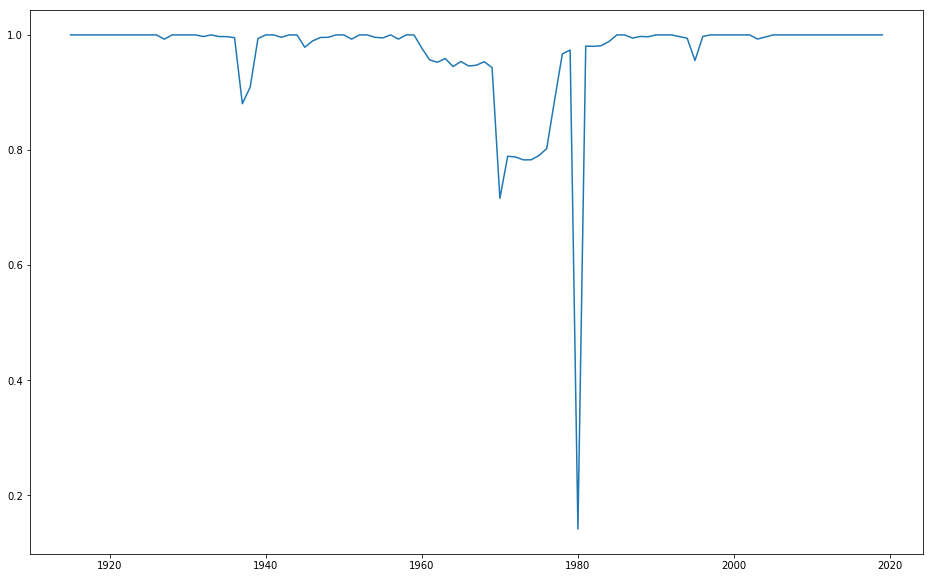

In [434]:
plt.figure(figsize=(16,10))
plt.plot(new['publication_date'], new['available'])

In [439]:
new[new['publication_date'] == 1980]

,publication_date,available
60,1980,0.140845
